# **Week 1:**
1.Introduce Kaggle game 

2.Register Kaggle Account, select one project, walkthrough Kaggle board:
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In week 1, we will cover the following:

Establishing project goals

Walk through project outline

Estimate knowledge of Python and Data Science/Machine Learning

Preparing data for use in competition

Exploring datasets


# Data Science Life Cycle Process:
1.Understand Business Problem

2.Collect Data

3.Pre-processing Data(ETL:Extract, Transform and Loading)

4.Analyzing data(EDA)

5.Data cleaning, feature engineering

6.Data Modelling

7.Model Evaluation/Monitoring

8.Model Training

9.Model Deployment

10.Driving insights and generating BI reports

11.Taking a decision and share with shareholders

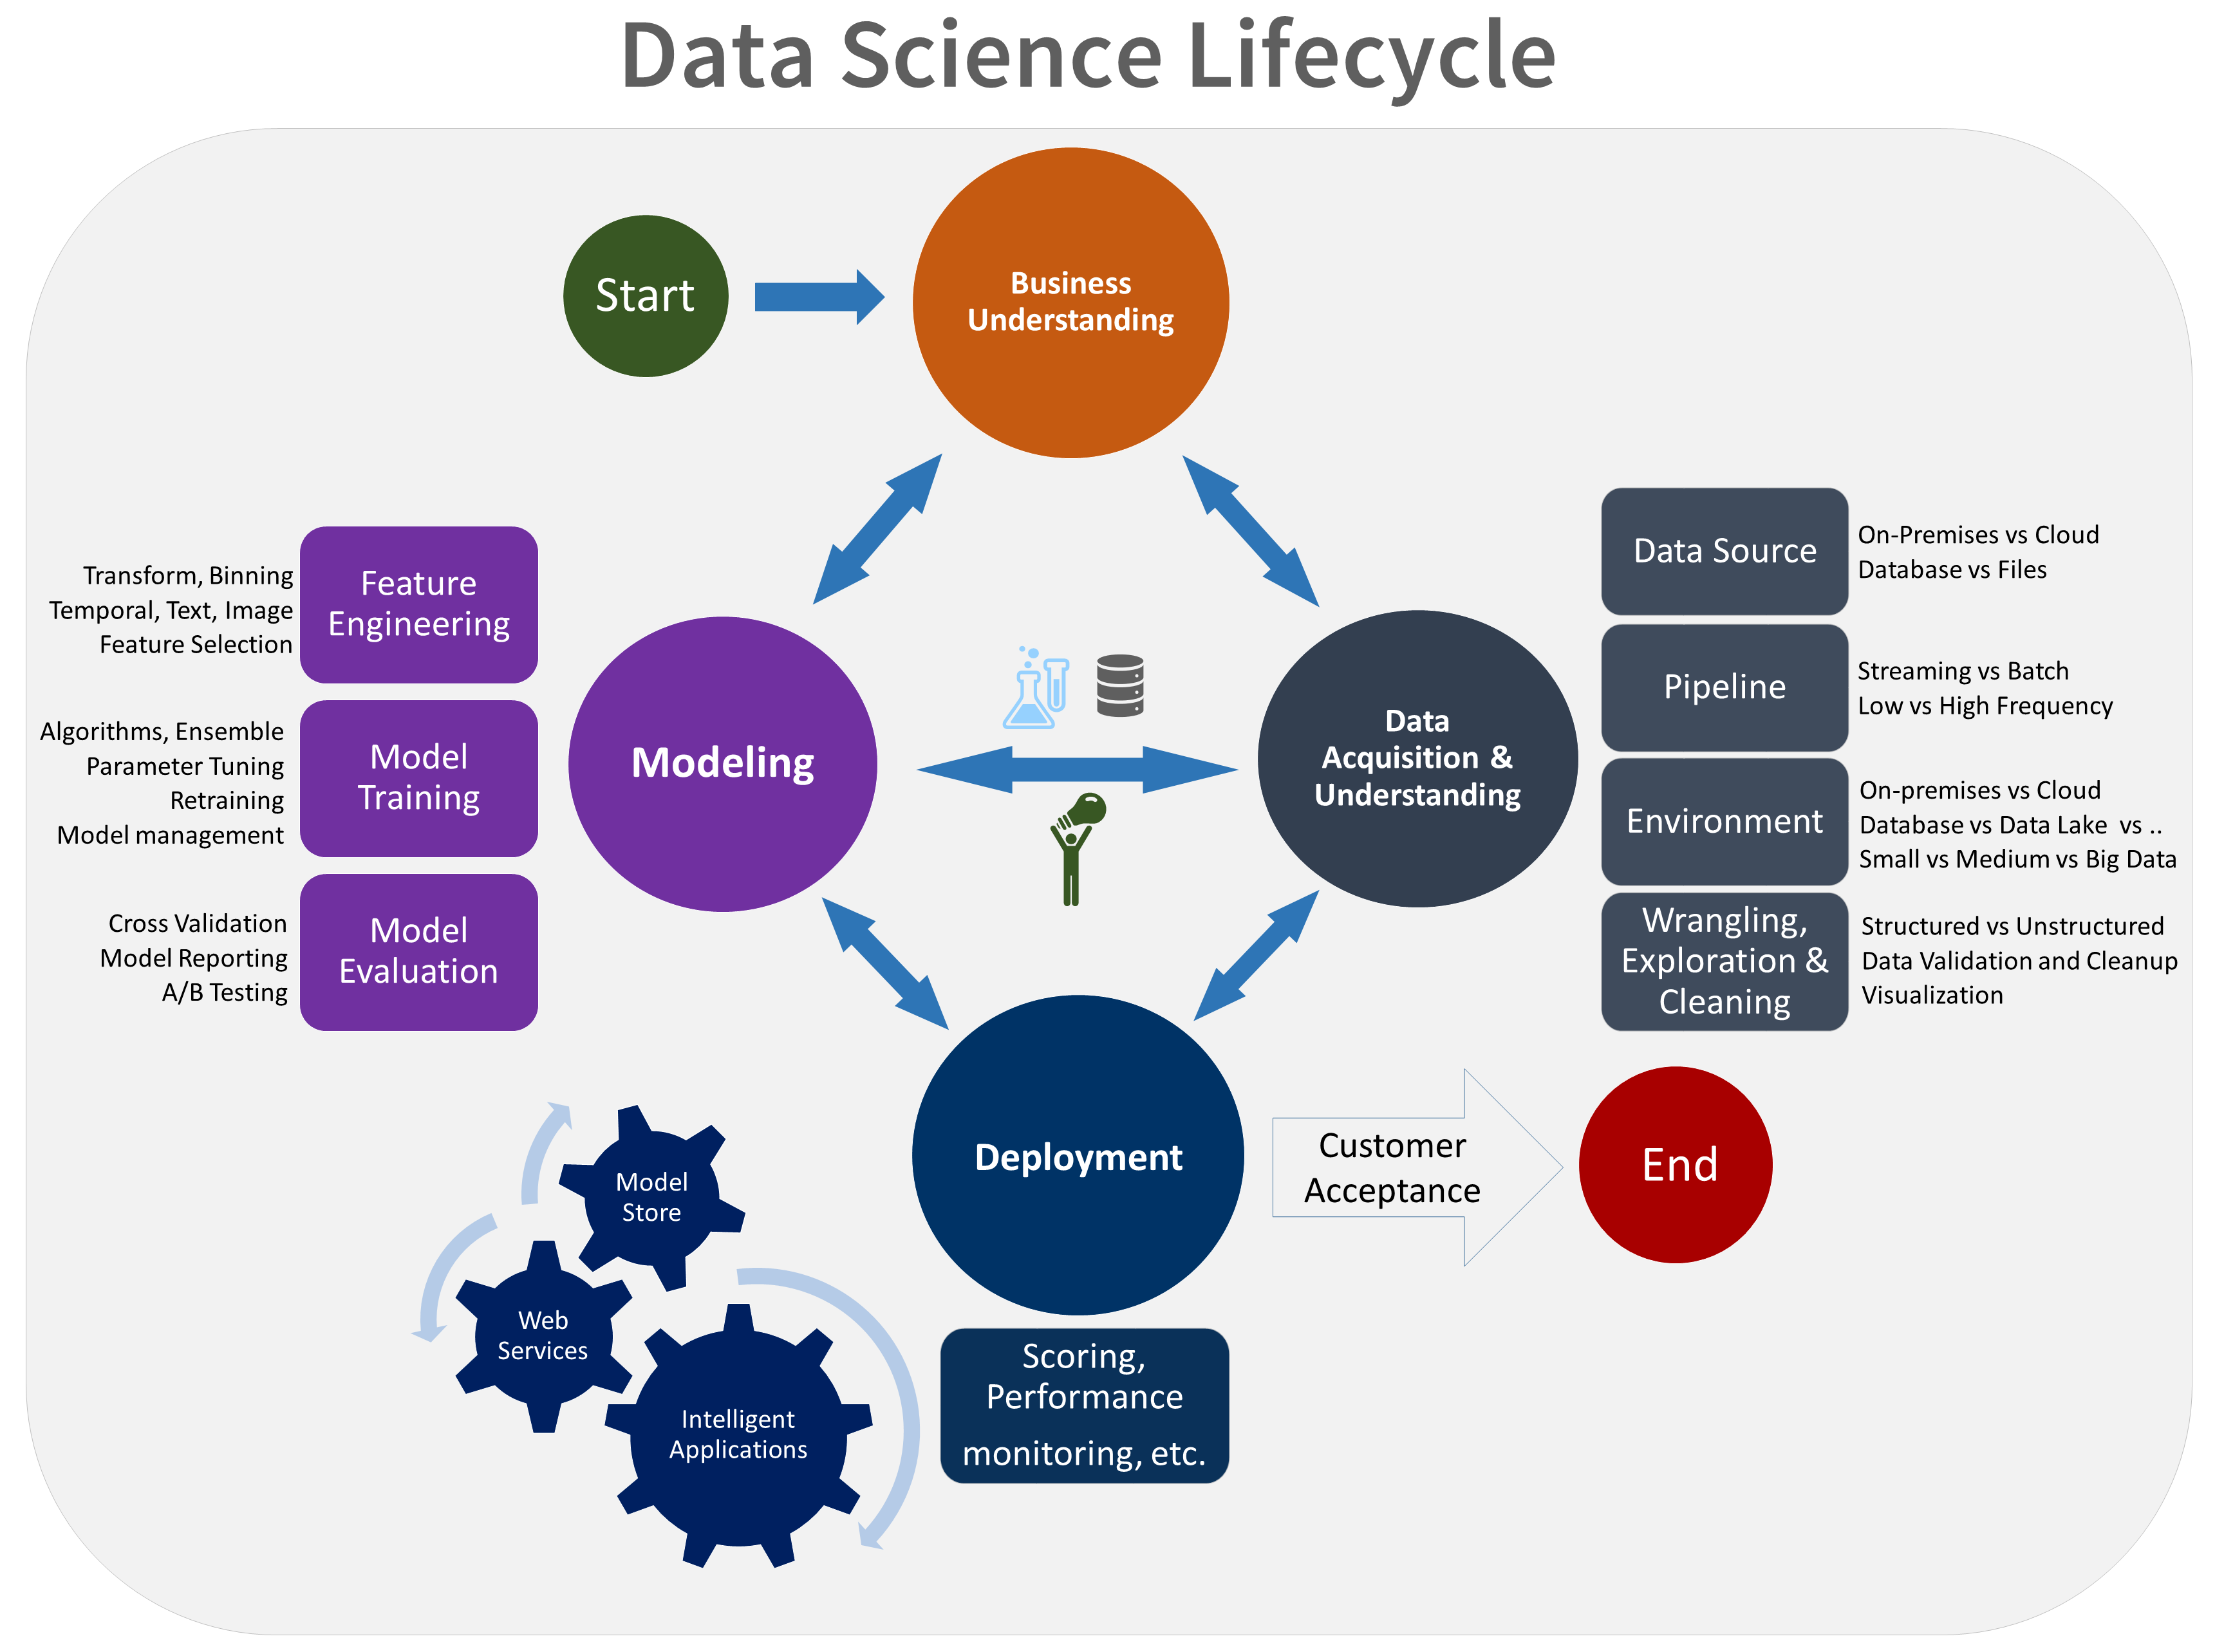

Supervised vs Unsupervised Machine Learning

Supervised Learning: Often we are interested in building a predictive model where we would like to learn how to predict the value (or label for categorical data) in one of the columns given the other values in the same table row. We call the value we're trying to predict the target. Here we want to discover if there is a functional relationship between the values in a row and the target. If so we can hopefully use this function to predict the value of the target when presented with a new observation having values for only the independent variables.
(label = target value)

Unsupervised Learning: This is when we have a dataset (say, a data table or a dataframe) and we're interested in finding patterns in the data, but not in trying to predict the value in a particular cell based on the other values in the same row. In this case we're interested in any inter-relationships that might exist between columns. The relationships could be a linear correlation, or perhaps something more complex. If we can find that some of the columns have even a loose functional relationship between them, it suggests (but certainly doesn't prove) that there might be an underlying cause and effect relationship between them, or as a result of them both being influenced by some common factor. This may lead us to develop additional experiments to better understand whether there truly is a correlation and if so why it exists.
(for example, give you shape, color and taste, you may guess its an apple or organe, 'apple' or 'organe' is not labled, nor in the table)

Typical Supervised Learning Methods:

1.Classification

Classification is a supervised learning algorithm that is used for categorical data. The following properties must be met to use classification:

1)The predictors (features) in the training dataset have labels.

2)The outcomes of the learned function  𝑓  are categorical.

For example: logistic regression, decision tree, random forest, gradient-boosted tree

2.Regression

Regression is a supervised learning algorithm that is used for numerical data. The following properties must be met to use regression:

1)The predictors (features) in the training dataset have labels.

2)The outcomes of the learned function  𝑓  are numerical.

Example:Linear/Non-linear/Multiple Regression Model

Here our dataset has all labes and the target variable is numerical, so here we will use supervised learning method - Regression/Random Forest

**Step1** - House Price Advanced Regression Techniques
  **Define Business Problem**:

Please write your Business Problem Analysis here:

For most people, buying a house is the single largest investment decision they will make. However how to make a decision to buy a house could be complicated and its hard to predict the house price. There are a lot of features may affect house price, age, roof, community, pool, square feet... it's advantageous to know where house value may be derived from and what a prospective house is worth. Similarly, existing homeowners looking to sell and maximize investment would benefit greatly in their decision-making process if they can predict the price of their home prior to listing it.

The project explores advanced regression techniques to predict housing prices in Ames Iowa. The data includes 79 features describing 1460 homes and price. While house price prediction is the main focus, we are also try to figure out the following questions:

What features are most correlated with housings prices?

What features are least correlated with housing price?

How does the feature engineering impact model performance?

Which machine learning models perform best predicting price?

Various imputation methods are employed to address missingness. Transformation and standardization are used to increase model performance. 5-Fold cross-validation is used to tune Hyper-Parameters on various models.




**Step2 -Data Sourcing & ETL-Prepare Dataset & Data Explore**

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics

In [2]:
pd.options.display.max_columns = None
np.random.seed(0)
#resource:
# To make this notebook's output identical for every run

In [4]:
from pandas.core.arrays.interval import NA
# To import csv dataset name as df, combine train and test dataset as one full dataset, make Id as index column, fill SalePrice from test dataset as NA if possible
# Add your code here
train = pd.read_csv("/content/sample_data/train.csv")
test = pd.read_csv("/content/sample_data/test.csv")


In [5]:
test['SalePrice'] = "NA"

In [ ]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [ ]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NA
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NA
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NA
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NA
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NA
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,NA
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,NA
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,NA
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,NA
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fa

In [6]:
#we can use concat function in python to full append datasets
#Resource:https://pandas.pydata.org/docs/user_guide/merging.html
#The reason we want to combine train and test, we want to do data cleanning in a dataset, then seperate data back to train and test then
#but it is not mandatory in machine learning, we can explore train data first and data cleaning together/seperately for train and test data later on
#you can also use merge and join function, review resource at : https://pandas.pydata.org/docs/user_guide/merging.html
df1 = pd.concat([train, test],ignore_index=True)
df1.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,1993,1993,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Ex,Gd,PConc,Gd,Gd,No,ALQ,310.0,Unf,0.0,370.0,680.0,GasA,Gd,Y,SBrkr,680,790,0,1470,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,1993.0,Fin,2.0,420.0,TA,TA,Y,232,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,183.0,Gd,TA,PConc,Gd,TA,Av,ALQ,1162.0,Unf,0.0,426.0,1588.0,GasA,Ex,Y,SBrkr,1588,0,0,1588,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,1999.0,RFn,2.0,472.0,TA,TA,Y,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,BrkFace,48.0,TA,TA,CBlock,TA,TA,No,Rec,520.0,Unf,0.0,440.0,960.0,GasA,TA,Y,FuseF,960,0,0,960,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1.0,432.0,TA,TA,P,120,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,No

In [ ]:
df1.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2909,2910,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,522.0,Unf,0.0,108.0,630.0,GasA,TA,Y,SBrkr,630,0,0,630,1.0,0.0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,NA
2910,2911,160,RM,21.0,1484,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1972,1972,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1972.0,Unf,1.0,253.0,TA,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NA
2911,2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1969,1979,Gable,CompShg,Plywood,Plywood,BrkFace,194.0,TA,TA,PConc,TA,TA,Av,Rec,119.0,BLQ,344.0,641.0,1104.0,GasA,Fa,Y,SBrkr,1360,0,0,1360,1.0,0.0,1,0,3,1,TA,8,Typ,1,TA,Attchd,1969.0,RFn,1.0,336.0,TA,TA,Y,160,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NA
2912,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,408.0,Unf,0.0,138.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,NA
2913,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,34,0,0,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,NA
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NA
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NA
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NA
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NA
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Nor

# **Exploring the Data**

In [50]:
#We'll start by creating a copy of the dataframe so any changes we make in data exploration won't affect the original data.
df_explore = df1.copy()

Next, we will:
Look at the shape of our training data

Display each feature as a dtype (data type)

Take a look at some samples

In [8]:
#Please shape dataset
# there are 1460 rows in train and 1459 rows in test totally is 2919 rows
df_explore.shape

(2919, 81)

In [ ]:
df_explore.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice         object
Length: 81, dtype: object

In [ ]:
df_explore.MoSold.dtypes

dtype('int64')

In [9]:
#Please print datatypes for all columns
# here we will use dtypes, print(df) is also a good example to see examples of df, but when dataset has large numbers and multiple variables, we will suggest df.dtypes to check
#all column data types and we can use df.head() to check first 10 rows of dataset as an example
df_explore.info(verbose=True)
#Whether to print the full summary. By default, the setting in pandas.options.display.max_info_columns is followed, it will also give you summary of data types, float64(38), object(43)
#Resource:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
df_explore.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice         object
Length: 81, dtype: object

In [ ]:
#Please show sample data for just 10 rows
# Add your code here: rows = df[1:11] is also a good way
df_explore.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Cor

In [ ]:
#Quantitative features
#Let's start by looking at our quantitative (numerical) features. We'll use DataFrame.describe() to see some summary statistics of each numeric column.
#summary could only shown for those numerical variables
# Add your code here
df_explore.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In this sample way, we can immediately see what is in the dataset and variables and values, to understand values of different variables, please refer to data description in the competition.

Caution: this is the initial insight of summary, the statistics might not be useful because there are missing values, outliers in the dataset.


For convenience, we can sort the variables by data type. First, we will create four lists containing just the variable names:

A list which contains just our dependent variable.


A list containing categorical variables (variables which represent non-numeric values).


A list containing discrete variables (variables that are limited to whole number values).


A list containing continuous variables (variables that can represent decimal values).

In [51]:
# Sort by dtype, e.g.dep_var means dependent variable which is dep_var = ['SalePrice'] here, please continue create other three lists below:
# Add your code here, e.g. here 'Fireplaces' datatype is numerical, we need to move it to discrete variables catrgory
# Categorize all independant variables into categorical/discrete/continues variables will help us deal with missing values later on, there are different ways to deal with missing values
# for different type of datatypes, we will talk about this later
dep_var = ['SalePrice']

categorical_vars = ['Alley','BldgType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','CentralAir',
                    'Condition1','Condition2','Electrical','ExterCond','ExterQual','Exterior1st','Exterior2nd','Fence',
                    'FireplaceQu','Foundation','Functional','GarageCond','GarageFinish','GarageQual',
                    'GarageType','Heating','HeatingQC','HouseStyle','KitchenQual','LandContour','LandSlope','LotConfig',
                   'LotShape','MSZoning','MasVnrType','MiscFeature','Neighborhood','PavedDrive','PoolQC','RoofMatl','RoofStyle',
                    'SaleCondition','SaleType','Street','Utilities']

discrete_vars = ['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath',
                'BsmtUnfSF','EnclosedPorch','Fireplaces','FullBath','GarageArea','GarageCars','GarageYrBlt','GrLivArea',
                 'HalfBath','Id','KitchenAbvGr','LotArea','LotFrontage','LowQualFinSF','MSSubClass','MasVnrArea','MiscVal',
                 'MoSold','OpenPorchSF','OverallCond','OverallQual','PoolArea','ScreenPorch','TotRmsAbvGrd','TotalBsmtSF',
                'WoodDeckSF','YearBuilt','YearRemodAdd','YrSold']


**Count the missing values in df_explore**

Identifying missing values: DataFrame.isna().

Try to list the names of all of the columns that contain missing values and the count of missing values in each column using just one line of code.

In [ ]:
#df.isna() will show T/F of full dataset each cell whether it is missing value, if it is for large dataset, it will not be easily for us to identify missing values summary in dataset
#Try to list the names of all of the columns that contain missing values and the count of missing values in each column using just one line of code.
#Python list comprehensions are an effective method for quickly running the same query over different data segments.
#Resource:https://www.datacamp.com/tutorial/python-list-comprehension
[(x, y) for x, y in zip(df_explore.isna().sum(), df_explore.isna().sum().index) if x > 0]

[(4, 'MSZoning'),
 (486, 'LotFrontage'),
 (2721, 'Alley'),
 (2, 'Utilities'),
 (1, 'Exterior1st'),
 (1, 'Exterior2nd'),
 (24, 'MasVnrType'),
 (23, 'MasVnrArea'),
 (81, 'BsmtQual'),
 (82, 'BsmtCond'),
 (82, 'BsmtExposure'),
 (79, 'BsmtFinType1'),
 (1, 'BsmtFinSF1'),
 (80, 'BsmtFinType2'),
 (1, 'BsmtFinSF2'),
 (1, 'BsmtUnfSF'),
 (1, 'TotalBsmtSF'),
 (1, 'Electrical'),
 (2, 'BsmtFullBath'),
 (2, 'BsmtHalfBath'),
 (1, 'KitchenQual'),
 (2, 'Functional'),
 (1420, 'FireplaceQu'),
 (157, 'GarageType'),
 (159, 'GarageYrBlt'),
 (159, 'GarageFinish'),
 (1, 'GarageCars'),
 (1, 'GarageArea'),
 (159, 'GarageQual'),
 (159, 'GarageCond'),
 (2909, 'PoolQC'),
 (2348, 'Fence'),
 (2814, 'MiscFeature'),
 (1, 'SaleType')]

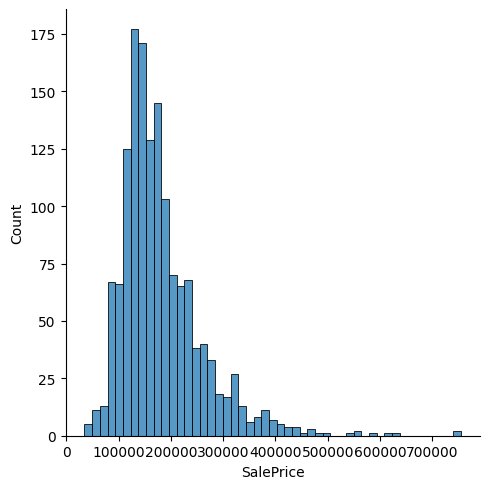

In [ ]:
#because df_explore['SalePrice] has NA part, here we just want to have a look at train data to explore data
sns.displot(train['SalePrice'])

SalePrice is our dependent variable. It has some characteristics that can be problematic for modelling.  Let's use the seaborn histplot function to view the price distribution.As expected, we have some outliers in the high thousands. We should transform this variable for exploration by taking its logarithm to see whether it is normal distribution.

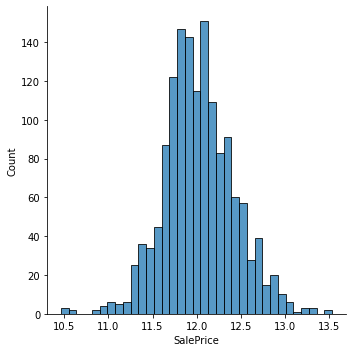

In [ ]:
sns.displot(np.log(train['SalePrice']))
train['log_price'] = np.log(train['SalePrice'])

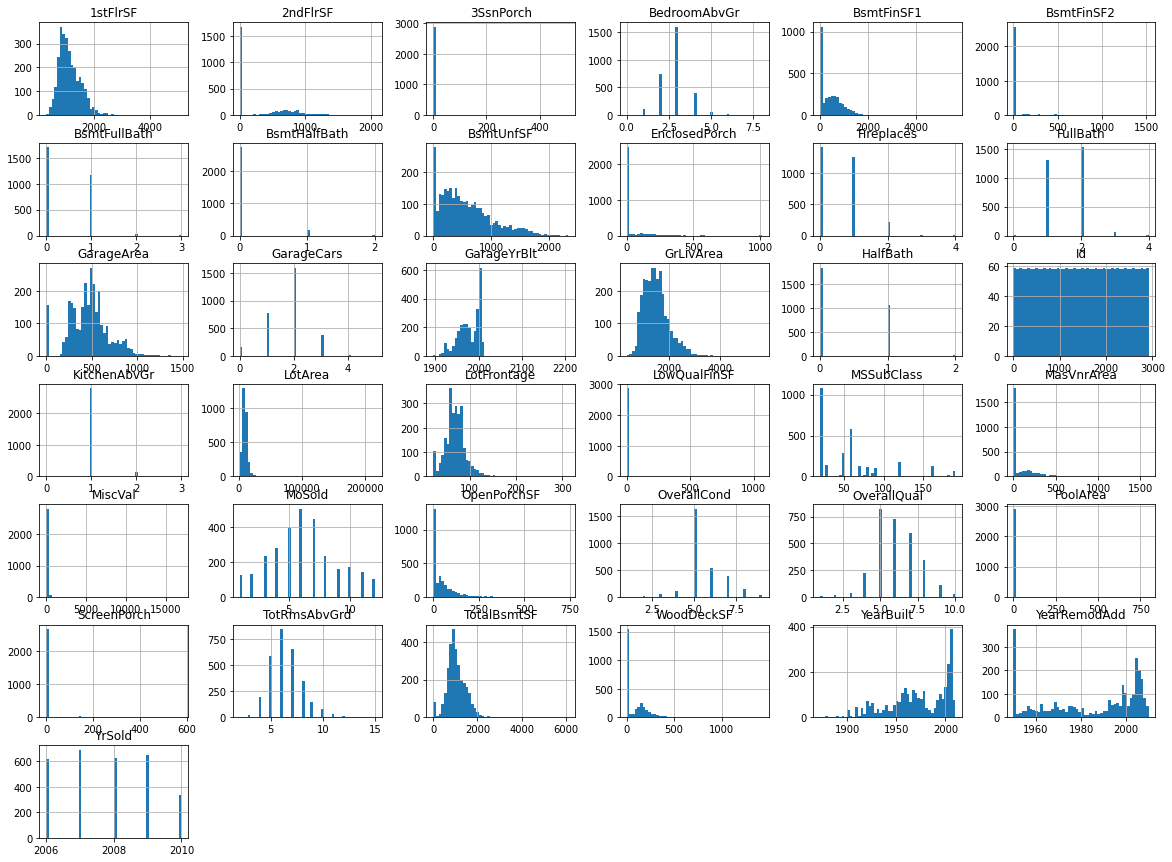

In [ ]:
#Now we will plot independent variables
#histogram plots, here we can see features have large difference in scales which i will transform in next step for data processing - pipeline
#loc function:The .loc property of the DataFrame object allows the return of specified rows and/or columns from that DataFrame. It can do so using a label or label(s),
#or a boolean array of the same size as the axis being filtered.
#resource: https://www.codecademy.com/resources/docs/pandas/dataframe/loc
#Inside the square brackets are specified indices for rows and, optionally, specified indices for columns.
#first_loc = df.loc[:,'col 3'] -> all rows + column:col3
#second_loc = df.loc[:2] -> rows from 0 to 2, default as all columns
#third_loc = df.loc[[0,3],'col 2':] -> rows 1 and row 3, columns from clo2
df_explore.loc[:, discrete_vars].hist(bins=50, figsize=(20,15))
plt.show()

We can use seaborn histplot to lay out all of the distributions in a grid. We can also take advantage of the pandas plotting function DataFrame.hist() to create a grid view.

Our data has many different characteristics: it is not normally distributed. For the discrete data (BsmtFinSF1) we can log transform just like we did with SalePrice.

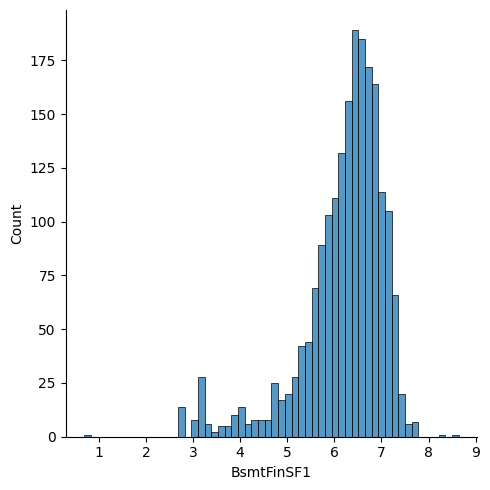

In [52]:
#The Why:Logarithmic transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset.
#When modeling variables with non-linear relationships, the chances of producing errors may also be skewed negatively.
#In theory, we want to produce the smallest error possible when making a prediction, while also taking into account that we should not be overfitting the model.
#Overfitting occurs when there are too many dependent variables in play that it does not have enough generalization of the dataset to make a valid prediction.
#Using the logarithm of one or more variables improves the fit of the model by transforming the distribution of the features to a more normally-shaped bell curve.
#resource:https://dev.to/rokaandy/logarithmic-transformation-in-linear-regression-models-why-when-3a7c#:~:text=The%20Why%3A,may%20also%20be%20skewed%20negatively.
df_explore['BsmtFinSF1'] = df_explore['BsmtFinSF1'].apply(np.log)
sns.displot(df_explore['BsmtFinSF1'].dropna())
plt.show()


Next before we deal with missing valeus, we want to see correlation to define most important numeric variables relate to SalePrice, also we can see if there is multicollinear issue. From correlation matrix, we can see correlation over 0.5 has ## variables

In [53]:
cormat = train.corr()
round(cormat,2)
#Since all independent variables are all discrete, I want to see their Corrleations, so we plot below;

<ipython-input-53-1beaf61a0fd1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = train.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.00,0.01,-0.01,-0.03,-0.03,0.01,-0.01,-0.02,-0.05,-0.01,-0.01,-0.01,-0.02,0.01,0.01,-0.04,0.01,0.00,-0.02,0.01,0.01,0.04,0.00,0.03,-0.02,0.00,0.02,0.02,-0.03,-0.00,0.00,-0.05,0.00,0.06,-0.01,0.02,0.00,-0.02
MSSubClass,0.01,1.00,-0.39,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,-0.14,-0.24,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.28,0.04,-0.05,0.09,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.01,-0.39,1.00,0.43,0.25,-0.06,0.12,0.09,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.04,0.40,0.10,-0.01,0.20,0.05,0.26,-0.01,0.35,0.27,0.07,0.29,0.34,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.01,0.01,0.35
LotArea,-0.03,-0.14,0.43,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,-0.02,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,-0.03,0.03,0.25,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,-0.06,0.31,0.54,0.48,0.30,-0.03,0.59,0.11,-0.04,0.55,0.27,0.10,-0.18,0.43,0.40,0.55,0.60,0.56,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,0.01,-0.06,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,0.04,-0.14,-0.17,-0.14,0.03,0.03,-0.08,-0.05,0.12,-0.19,-0.06,0.01,-0.09,-0.06,-0.02,-0.32,-0.19,-0.15,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08
YearBuilt,-0.01,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.32,0.25,-0.05,0.15,0.39,0.28,0.01,-0.18,0.20,0.19,-0.04,0.47,0.24,-0.07,-0.17,0.10,0.15,0.83,0.54,0.48,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,-0.02,0.04,0.09,0.01,0.55,0.07,0.59,1.00,0.18,0.13,-0.07,0.18,0.29,0.24,0.14,-0.06,0.29,0.12,-0.01,0.44,0.18,-0.04,-0.15,0.19,0.11,0.64,0.42,0.37,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
MasVnrArea,-0.05,0.02,0.19,0.10,0.41,-0.13,0.32,0.18,1.00,0.26,-0.07,0.11,0.36,0.34,0.17,-0.07,0.39,0.09,0.03,0.28,0.20,0.10,-0.04,0.28,0.25,0.25,0.36,0.37,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.48
BsmtFinSF1,-0.01,-0.07,0.23,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,0.21,0.65,0.07,0.06,0.00,-0.11,-0.08,0.04,0.26,0.15,0.22,0.30,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39


<AxesSubplot:>

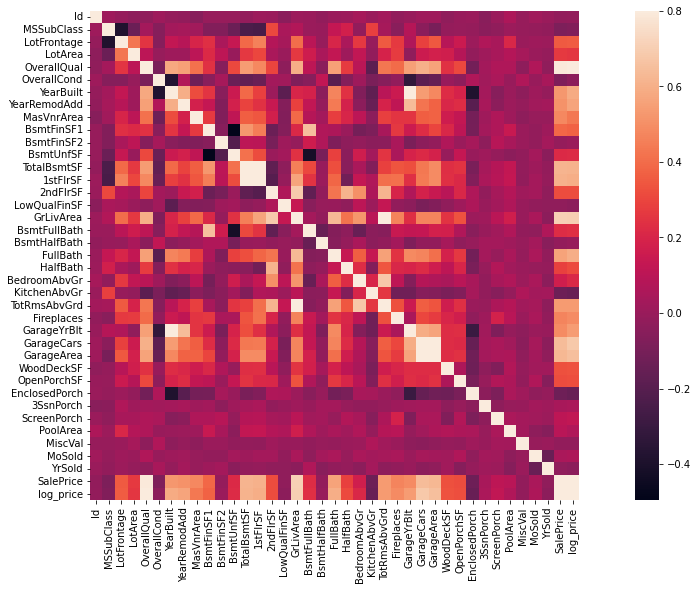

In [ ]:
f, ax =plt.subplots(figsize=(20, 9))
sns.heatmap(cormat, vmax=0.8, square=True)

Then plot highest correction variables (at least 3) with SalePrice to find outliers if possible

Index(['SalePrice', 'log_price', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd'],
      dtype='object')


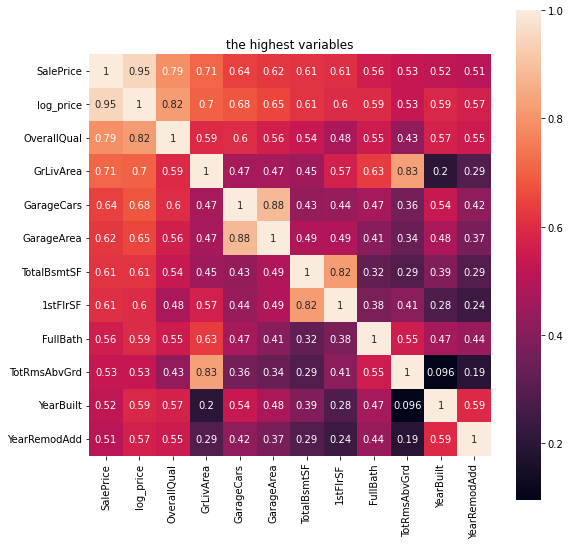

In [ ]:
highcor_var = cormat.loc[cormat.SalePrice.abs()>0.5].sort_values(by
='SalePrice',ascending = False).index
highcor_data = train.loc[:,highcor_var]
fig,ax = plt.subplots(figsize = (9,9))
fig = sns.heatmap(highcor_data.corr(),annot = True,square = True)
plt.title('the highest variables')
print(highcor_var)

There are different approaches that we can take to handle these missing values. 1) Drop them
2) We can fill in the missing values with a variety of methods (e.g. by taking the mean or mode of the feature or by predicting the value based on other features).
For exploration, we need to think these missing values are missing randomly or not? If they are missing randomly, we can convert those character variables into integer and using multiple imputation method. However, if missing values are not missing randomly, we need to fix missing values for each variable one by one. Think about which variables have missing values but not missing randomly. e.g.PoolQC, it has 4 qualities: Ex-Excellent, Gd-Good, TA-Average/Typical, Fa-Fair, NA-No Pool, so here missing value NA means houses without pools. What about others? Please list those missing values you think not missing randomly.

## Week2:
## Data Cleaning and Pre-Processing


From above analysis, we know each columns missing values counts, now we want to know weight of columns missing values and identify if we want to drop or fix.

First, we want to deal with all variables with missing values.

# Option1:
We can simply dropped records where values were missing use df.dropna(). This strategy can work in certain circumstances, but we may find that we lose valuable data.

# Option 2:
Imputer:we can fill in the missing data according to an appropriate rule.

SimpleImputer() transformer. This class offers a variety of options we can use for different types of features, it works for variety datatypes including categorical and numerical values. For our categorical values, we can assign missing values to an "other" category — e.g. SimpleImputer(strategy='constant', fill_value='Other'). For our numerical values, we can use the "median" method (SimpleImputer(strategy='median')).

# Option 3:
Categorical encoders for categorical features using OneHotEncoder(sparse=False)
resource:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html it will automatically transfer categorical values into numerical values from training data.For example from above data exploration
MSZoning distinct values have 'RL', 'RM', 'C (all)', 'FV', 'RH', nan, we can onehotencoder like 1,2,3,4,5,6.

# Option4:
Feature scalers
Using different features that have hugely different scales can be problematic for some machine learning models. Therefore, it is good practice to implement a scaling function on numerical values.

There are two main scaling methods:

Normalization or min/max scaling shifts and rescales data points between the values 0 and 1. This method is more likely to be affected by outliers.

Min/max scaler: This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


Standardization works best with normally distributed data by subtracting the mean value from each data point and dividing by the standard deviation.

There is no guaranteed rule for choosing between these methods, but data exploration can help to identify features that may be problematic for either method.

We will use the MinMaxScaler() on all of our numerical (discrete) features. Our exploration did not reveal many outliers and it is best to use a consistent scaling method. If you would like to experiment, you can replace the MinMaxScaler() with the StandardScaler() and examine the impact on the models.

In [54]:
import re
import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

def rmse(a, b):
    return np.sqrt(np.mean((a-b)**2))
pd.options.display.max_columns = None
np.random.seed(123)

In [55]:
#SimpleImputer() example for categorical features:
print(df_explore[['Alley']].values[:, 0]) #df_explore[['Alley']]returns all rows and columns from first column without all index/column names
tfmr1 = SimpleImputer(strategy='constant', fill_value='Other')
print(tfmr1.fit_transform(df_explore[['Alley']].values)[:, 0])

[nan nan nan ... nan nan nan]
['Other' 'Other' 'Other' ... 'Other' 'Other' 'Other']


In [56]:
df_explore['Alley']=tfmr1.fit_transform(df_explore[['Alley']].values)[:, 0]

In [57]:
#SimpleImputer() example for numerical features:
print(df_explore[['1stFlrSF']].values[:, 0])
tfmr2 = SimpleImputer(strategy='median')
print(tfmr2.fit_transform(df_explore[['1stFlrSF']].values)[:, 0])

[ 856 1262  920 ... 1224  970  996]
[ 856. 1262.  920. ... 1224.  970.  996.]


In [58]:
df_explore['1stFlrSF']=tfmr2.fit_transform(df_explore[['1stFlrSF']].values)[:, 0]

In [59]:
#OneHotEncoder
print(df_explore[['Alley']].values)
tfmr3 = OneHotEncoder(sparse=False)
df_explore['Alley']=tfmr3.fit_transform(df_explore[['Alley']].values)
print(df_explore['Alley'])

[['Other']
 ['Other']
 ['Other']
 ...
 ['Other']
 ['Other']
 ['Other']]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2914    0.0
2915    0.0
2916    0.0
2917    0.0
2918    0.0
Name: Alley, Length: 2919, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
#MinMaxScaler()
print(df_explore[['1stFlrSF']].values[:, 0])
#df is a DataFrame with several columns and apparently the target values are on the first column.

#df.values returns a numpy array with the underlying data of the DataFrame, without any index or columns names.

#[:, 0] is a slice of that array, that returns all rows and every column starting from the first column. (the first column is index 0)
tfmr4 = MinMaxScaler()
tfmr4.fit_transform(df_explore[['1stFlrSF']].values)[:, 0]

[ 856 1262  920 ... 1224  970  996]


array([0.10964083, 0.19491703, 0.12308339, ..., 0.18693552, 0.13358538,
       0.13904642])

In [ ]:
#From above data exploration, we know the following highest correction variables missing values are:
#'OverallQual':n/a
#'GrLivArea':n/a
#'GarageCars':1 for this variable(check data type: float) and also it is discrete_vars, we will replace missing value as 0
#'GarageArea':1 for this variable(check data type: float) and also it is discrete_vars, we will replace missing value as 0
# 'TotalBsmtSF':1 for this variable(check data type: float) and also it is discrete_vars, we can not simply replace it as 0,
                #we can simple imputer as mean value or drop it(since it is only 1 missing value), here we choose simple imputer as constent solutions
#'1stFlrSF':1  for this variable(check data type: float) and also it is discrete_vars, we choose simple imputer as constent solutions as same as above
#'FullBath':n/a
#'TotRmsAbvGrd':n/a
#'YearBuilt':n/a
#'YearRemodAdd':n/a
#you can go back to df_explore.dtypes to double confirm , so here we deal with 'GarageCars','GarageArea','TotalBsmtSF','1stFlrSF' first

In [60]:

df_explore['GarageCars'] = df_explore['GarageCars'].fillna(0)
df_explore['GarageArea'] = df_explore['GarageArea'].fillna(0)

In [ ]:
print(df_explore[['1stFlrSF']].values[:, 0])
tfmr = SimpleImputer(strategy='median')
tfmr.fit_transform(df_explore[['1stFlrSF']].values)[:, 0]
print(tfmr.fit_transform(df_explore[['1stFlrSF']].values)[:, 0])

[ 856 1262  920 ... 1224  970  996]
[ 856. 1262.  920. ... 1224.  970.  996.]


In [38]:
print(df_explore[['TotalBsmtSF']].values[:, 0])
tfmr5 = SimpleImputer(strategy='median')
tfmr5.fit_transform(df_explore[['TotalBsmtSF']].values)[:, 0]
print(tfmr5.fit_transform(df_explore[['TotalBsmtSF']].values)[:, 0])

[ 856. 1262.  920. ... 1224.  912.  996.]
[ 856. 1262.  920. ... 1224.  912.  996.]


In [42]:
#check missing values to see if we dealth with it sucessfully
[(x, y) for x, y in zip(df_explore.isna().sum(), df_explore.isna().sum().index) if x > 0]

[(4, 'MSZoning'),
 (486, 'LotFrontage'),
 (2, 'Utilities'),
 (1, 'Exterior1st'),
 (1, 'Exterior2nd'),
 (24, 'MasVnrType'),
 (23, 'MasVnrArea'),
 (81, 'BsmtQual'),
 (82, 'BsmtCond'),
 (82, 'BsmtExposure'),
 (79, 'BsmtFinType1'),
 (1, 'BsmtFinSF1'),
 (80, 'BsmtFinType2'),
 (1, 'BsmtFinSF2'),
 (1, 'BsmtUnfSF'),
 (1, 'TotalBsmtSF'),
 (1, 'Electrical'),
 (2, 'BsmtFullBath'),
 (2, 'BsmtHalfBath'),
 (1, 'KitchenQual'),
 (2, 'Functional'),
 (1420, 'FireplaceQu'),
 (157, 'GarageType'),
 (159, 'GarageYrBlt'),
 (159, 'GarageFinish'),
 (159, 'GarageQual'),
 (159, 'GarageCond'),
 (2909, 'PoolQC'),
 (2348, 'Fence'),
 (2814, 'MiscFeature'),
 (1, 'SaleType')]

Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
       '3SsnPorch', 'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr'],
      dtype='object')


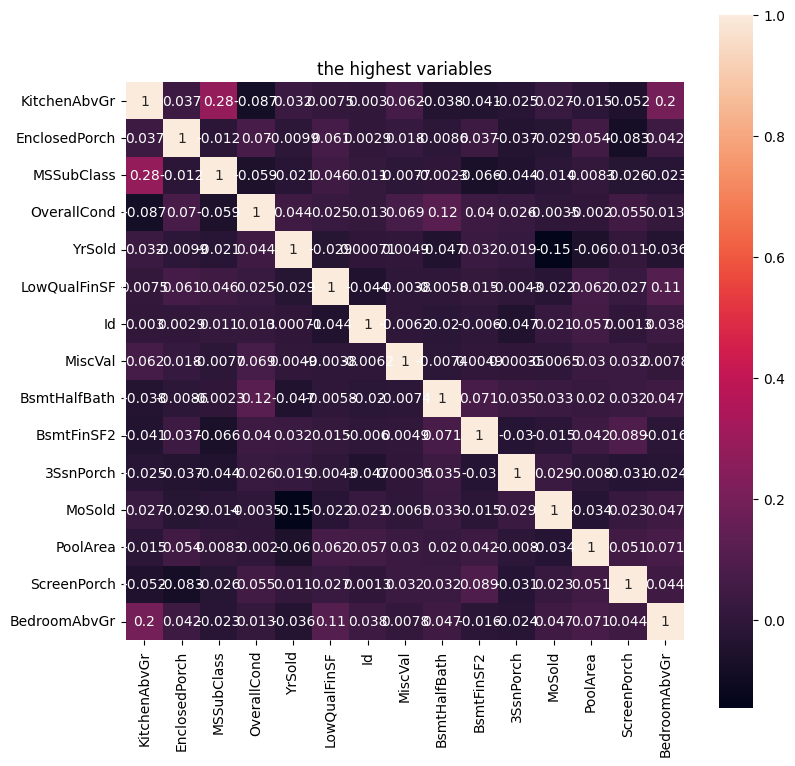

In [21]:
#For other variables which has less missing values and lowest corrections, we can simply drop it
lowcor_var = cormat.loc[cormat.SalePrice.abs()<0.2].sort_values(by
='SalePrice',ascending = True).index
lowcor_data = train.loc[:,lowcor_var]
fig,ax = plt.subplots(figsize = (9,9))
fig = sns.heatmap(lowcor_data.corr(),annot = True,square = True)
plt.title('the highest variables')
print(lowcor_var)

In [ ]:
#missing values for following lowest correction variables:
#'KitchenAbvGr', n/a
#'EnclosedPorch', n/a
#'MSSubClass', n/a
#'OverallCond', n/a
#'YrSold',n/a
#'LowQualFinSF', n/a
#'Id', n/a
#'MiscVal', n/a
#'BsmtHalfBath', 2
#'BsmtFinSF2',1
#'3SsnPorch', na
#'MoSold', na
#'PoolArea', na
#'ScreenPorch', na
#'BedroomAbvGr' na
#Again, #you can go back to df_explore.dtypes to double confirm
#since here those low correction dis variables has low missing values, we can do simple imputer with other dis variables together to reduce our effort
#because they don't impact a lot on predicting saleprice

In [22]:
len(train)

1460

In [23]:
len(test)

1459

Bringing the pipeline together
Here are the transformation pipelines for the categorical and independent variables.

In [24]:
# Categorical - impute, one hot encode
cat_si_step = ('si', SimpleImputer(strategy='constant', fill_value='Other'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_si_step, cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_vars)]

# Numerical - impute, scale
num_si_step = ('si', SimpleImputer(strategy='mean'))
num_scl_step = ('scl', MinMaxScaler())
num_steps = [num_si_step, num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, discrete_vars)]

In [25]:
ct = ColumnTransformer(transformers=cat_transformers+num_transformers)
ct.fit(train[categorical_vars+discrete_vars])
ct.fit(test[categorical_vars+discrete_vars])
X_train = ct.transform(train[categorical_vars+discrete_vars])
X_pred = ct.transform(test[categorical_vars+discrete_vars])
# We know from our exploration that the dependent variable 'SalePrice' does have missing values for test data
# the dependent variable.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
y_train = train[['SalePrice']].values
y_pred = test[['SalePrice']].values
#both train and test convert to list and array, now we need to split train dataframe into 2:8 and training model to see which model performs best
#Then we will do the regression model

In [27]:
X = X_train
y = y_train

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #here train and test all from X_train, y_train

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 293) (292, 293) (1168, 1) (292, 1)


Now, we can use our pipelines to transform our data.

Reference: Train, Test Split for dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Here because we already has splitted datasets, so we dont need to split ourselves.

# Week 3:
From this week, we will start to create models like Linear Regression, Random Forest, Gardient Boost and etc. Then we will use Cross Validation Check, ROC curve and etc. to determine which model has better performance and lastly we will use best model to predict house price.





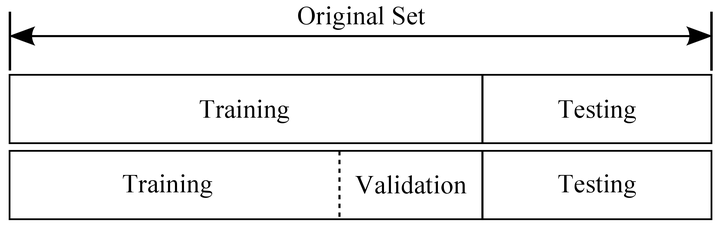

In [ ]:
#1.Multi Linear Regression:
#diagram

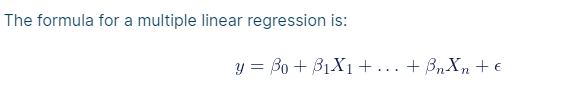


In [ ]:
#In this diagram, we have three independent variables (x1, x2, and x3) and one dependent variable (y). The goal of Multiple Linear Regression is to find the best linear relationship between the independent variables and the dependent variable.

#The line in the diagram represents the predicted values of y based on the values of x1, x2, and x3. The distance between the predicted values and the actual values of y is measured by the residual, which is represented by the vertical lines between the predicted values and the actual values.

#The coefficients b1, b2, and b3 represent the strength of the linear relationship between each independent variable and the dependent variable, while b0 represents the intercept, which is the value of y when all the independent variables are equal to 0.

#Overall, Multiple Linear Regression is a useful technique for modeling the relationship between multiple independent variables and a single dependent variable, and can be applied in a wide range of fields including finance, economics, and social sciences.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

reg = LinearRegression()
reg.fit(X_train, np.ravel(y_train))

LinearRegression()

In [ ]:
#Evaluate the model on the test data:
# Use the trained model to make predictions on the test data
y_pred = reg.predict(X_test)


In [ ]:
cv_results = cross_val_score(reg, X_train, y_train, cv=5)

In [ ]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300]
}



In [ ]:
# Create a GridSearchCV object and fit it to the training data
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))
#In the above code, we use the GridSearchCV function from the sklearn.model_selection module to search over a grid of values
#for the "n_estimators" parameter. The cv parameter specifies the number of folds for cross-validation (in this case, 5).

#After fitting the GridSearchCV object to the training data, we print the best parameters and best score.
#The best parameters correspond to the optimal value of "n_estimators" that gives the highest cross-validation score.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

Best parameters: {'n_estimators': 200}
Best score: 0.02
